<a href="https://colab.research.google.com/github/ashikaede/CCADMACL-Final-Project/blob/main/DBSCAN_ML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


In [19]:
#Select two features for demonstration (feel free to change these)
df_sub  = df[['HighBP', 'HighChol']].dropna()

In [20]:
df_sub = df_sub .sample(frac=0.7, random_state=42)

In [21]:
X = df_sub.values

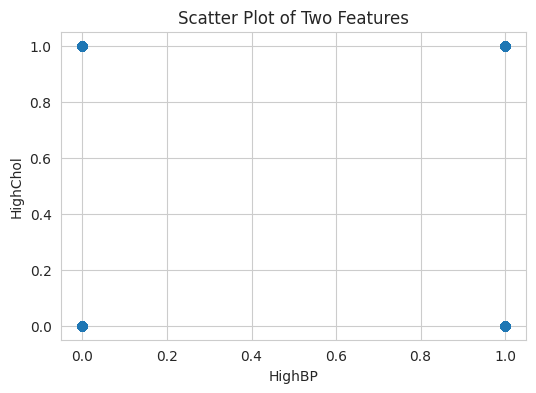

In [22]:
#Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.xlabel("HighBP")
plt.ylabel("HighChol")
plt.title("Scatter Plot of Two Features")
plt.show()


In [23]:
#Set DBSCAN parameters
# Adjust 'eps' and 'min_samples' to tune how strictly points form clusters.
# If you get only one cluster or mostly noise (-1), try a larger eps.
eps_value = 0.5     # radius
min_samples_value = 5   # core point samples

In [24]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
model = dbscan.fit(X)
labels = model.labels_

In [25]:
# Identify the core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

In [26]:
#Calculate the number of clusters (excluding noise if label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [27]:
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise_}")


Estimated number of clusters: 4
Estimated number of noise points: 0


In [29]:
# Silhouette Score (only valid if n_clusters > 1)
if n_clusters > 1:
    silhouette = metrics.silhouette_score(X, labels)
    print(f"Silhouette Coefficient: {silhouette:.3f}")
else:
    print("Silhouette score not defined for a single cluster or no clusters.")

Silhouette Coefficient: 1.000


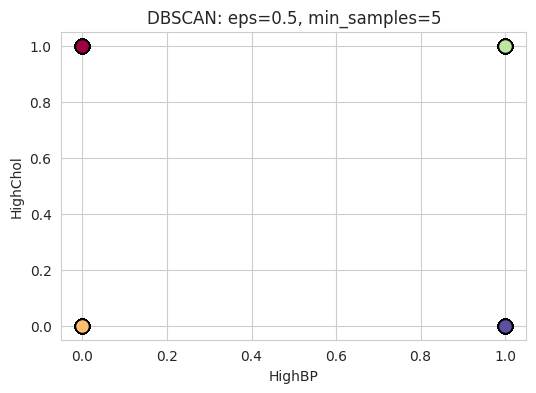

In [30]:

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(6, 4))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    # Plot non-core (edge) samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=5,
    )

plt.title(f"DBSCAN: eps={eps_value}, min_samples={min_samples_value}")
plt.xlabel("HighBP")
plt.ylabel("HighChol")
plt.show()


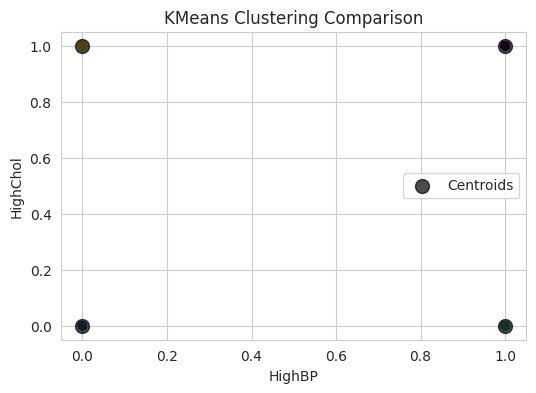

In [31]:
#Comparing with kmeans
# 4 muna na clusters arbitrarily here
clusters = 4
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7, label='Centroids')
plt.xlabel("HighBP")
plt.ylabel("HighChol")
plt.title("KMeans Clustering Comparison")
plt.legend()
plt.show()